## Clustering Models Notebook

In this notebook, i will explore K-means clustring model to segment customers based on their purchase behavior.

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('C:/Users/danie/Documents/GitHub/customer-loyalty-segmentation/data/processed/customer_features.csv')

In [5]:
df

,Customer ID,Recency,Frequency,Monetary,Total Orders,Average Price
0,12346,0.749138,-0.305504,-0.005997,-0.305504,4.146301
1,12608,-0.530946,-0.430607,-0.446982,-0.430607,-0.855291
2,12745,0.308789,-0.412735,-0.435667,-0.412735,-0.922182
3,12746,0.861785,-0.400820,-0.359005,-0.400820,0.980176
4,12747,-0.889369,0.302139,0.663055,0.302139,1.116461
...,...,...,...,...,...,...
3833,18283,-0.756241,0.754892,0.499472,0.754892,-0.729097
3834,18284,-0.254448,-0.371034,-0.408243,-0.371034,-0.985202
3835,18285,2.090666,-0.454436,-0.442667,-0.454436,0.465418
3836,18286,0.206382,-0.150615,-0.112599,-0.150615,0.144911


#### K-Means Clustering

K-means is an unsupervided learning algorithm that clusters data based on similarity.

The algorithm try to minimize the distance intra-cluster and maximize the distance inter-cluster.

- K is the number of clusters
- Euclidean distance is used almost of times to measure the similarity (distance between two points)
- The algorithm starts by randomly selecting K points as the initial centroids
- K-means is sensible to outliers, because they can affect the centroids
- K-means do not guarantee the global optimum, only the local optimum (depends on the initial centroids)
- K-means assumes that the clusters are spherical and have the same variance

In [34]:
from sklearn.cluster import KMeans

df_customers = df.copy()

features = ['Recency', 'Frequency', 'Monetary', 'Total Orders', 'Average Price']

kmeans = KMeans(n_clusters=4, random_state=42)

df_customers['Cluster'] = kmeans.fit_predict(df_customers[features])

In [35]:
df_customers[['Customer ID', 'Cluster']].head()

df_customers['Cluster'].value_counts()

Cluster
1    2640
0     951
2     240
3       7
Name: count, dtype: int64

Calculating elbow method to determine optimal number of clusters

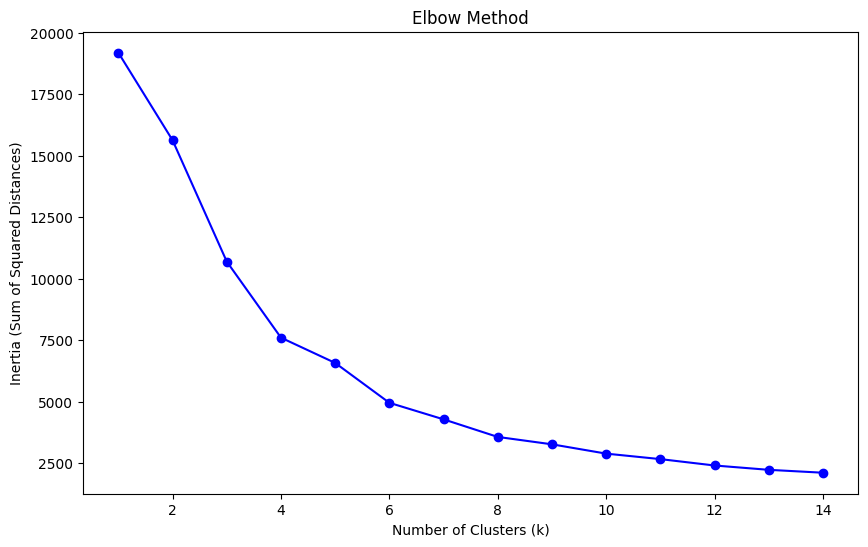

In [36]:
import matplotlib.pyplot as plt

inertia = []
k_values = range(1, 15)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_customers[features])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()


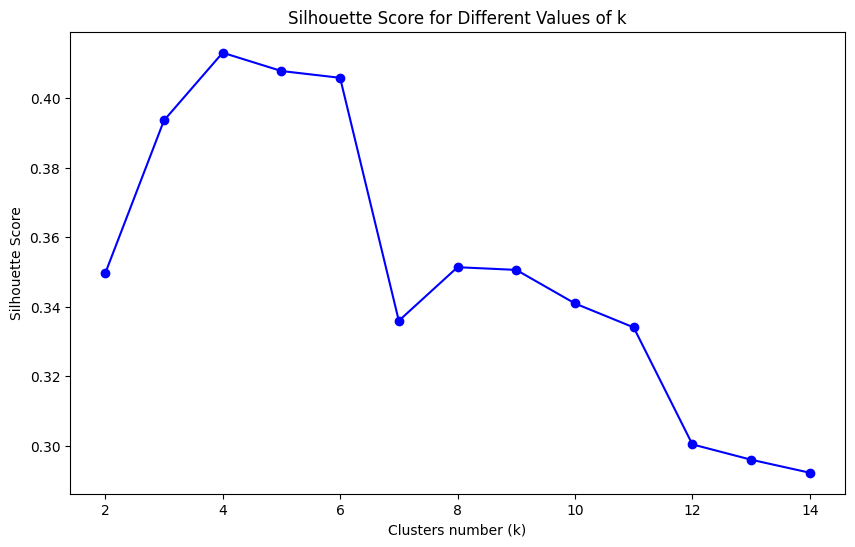

In [37]:
from sklearn.metrics import silhouette_score

sil_scores = []
k_values = range(2, 15)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_customers[features])
    labels = kmeans.labels_
    sil_scores.append(silhouette_score(df_customers[features], labels))

plt.figure(figsize=(10, 6))
plt.plot(k_values, sil_scores, 'bo-')
plt.xlabel('Clusters number (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.show()

In [38]:
print(df_customers['Cluster'].value_counts())

Cluster
1    2640
0     951
2     240
3       7
Name: count, dtype: int64


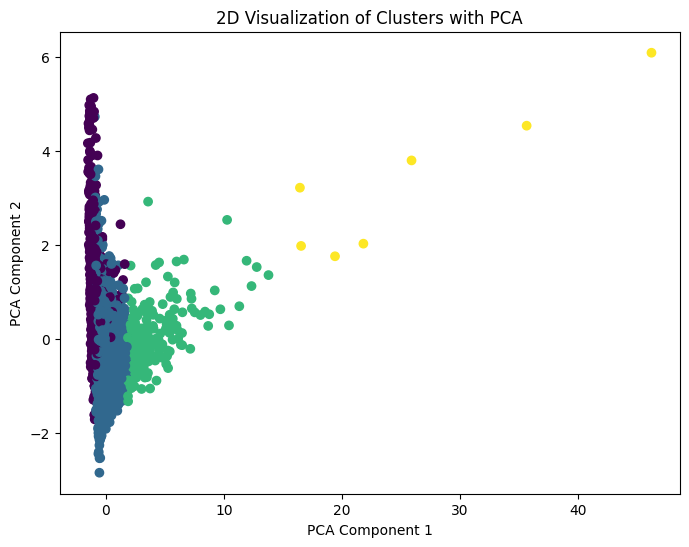

In [41]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_customers[features])


plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df_customers['Cluster'], cmap='viridis')
plt.title('2D Visualization of Clusters with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
